In [ ]:
import yfinance as yf
import pandas as pd

# Download last 5 years of daily stock prices for Apple
df = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Save to CSV (optional)
df.to_csv(r"dataset")

# View the first few rows of the data
df.head()
# Create lag features (e.g., previous 7 days)
for i in range(1, 8):
    df[f'Lag_{i}'] = df['Close'].shift(i)

# Drop rows with missing values (due to shifting)
df = df.dropna()

# View the first few rows with lag features
df.head()
from sklearn.model_selection import train_test_split

# Select 'Close' price for prediction
X = df.drop('Close', axis=1)  # Features (lags)
y = df['Close']  # Target (close price)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
from sklearn.preprocessing import MinMaxScaler

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# View the scaled data
print(X_train_scaled[:5])


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


[[0.04468968 0.05017911 0.04605794 0.08734093 0.04857474 0.04863963
  0.04867212 0.04972567 0.04653225 0.0452354  0.04528399]
 [0.04771944 0.05209639 0.04863208 0.15738217 0.05017961 0.04857474
  0.04863963 0.04867212 0.04972567 0.04653225 0.0452354 ]
 [0.05100849 0.05290632 0.05141675 0.20041918 0.05311362 0.05017961
  0.04857474 0.04863963 0.04867212 0.04972567 0.04653225]
 [0.05078171 0.05113778 0.04858356 0.2504402  0.05165469 0.05311362
  0.05017961 0.04857474 0.04863963 0.04867212 0.04972567]
 [0.0521589  0.05639398 0.05379671 0.21730591 0.05637196 0.05165469
  0.05311362 0.05017961 0.04857474 0.04863963 0.04867212]]


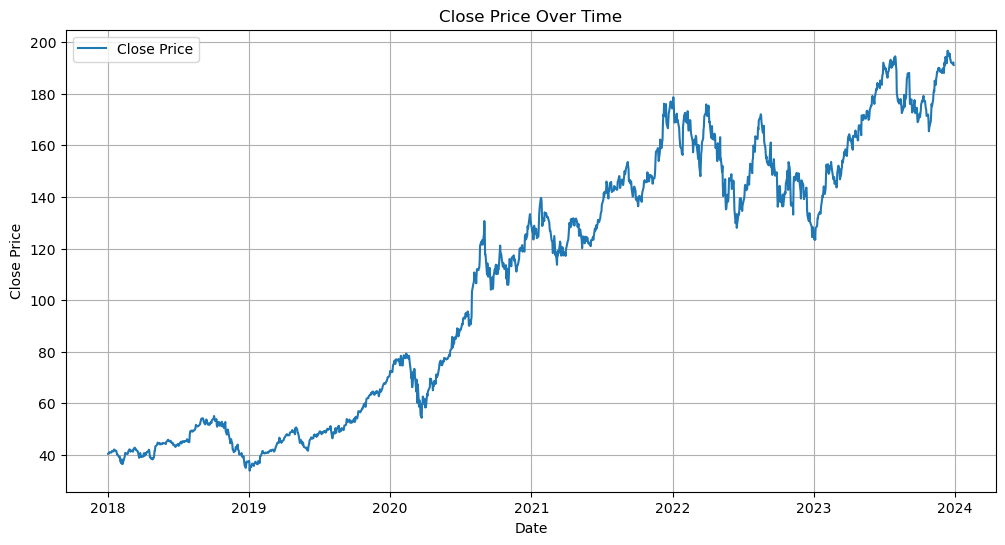

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV and skip the first two header rows
df = pd.read_csv(r"dataset", skiprows=2)

# Step 2: Rename columns properly
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Step 3: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 4: Convert numeric columns
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 5: Drop rows with missing values
df.dropna(inplace=True)

# Step 6: Visualizations

# 1. Line plot - Close Price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


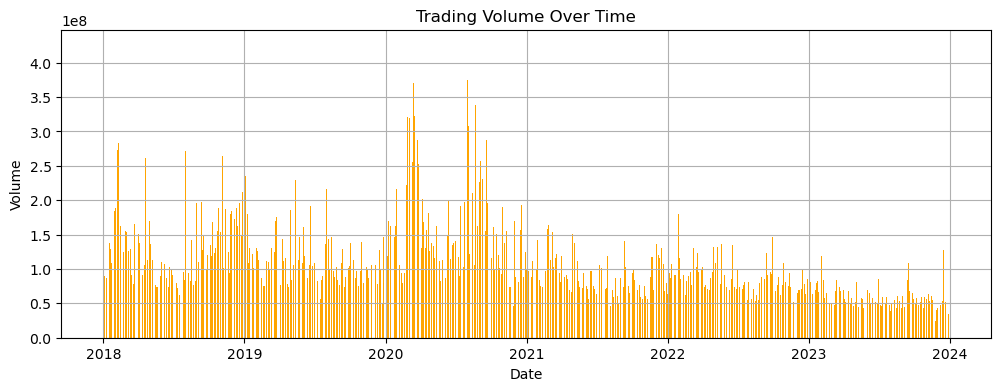

In [3]:
# 2. Volume Over Time
plt.figure(figsize=(12, 4))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

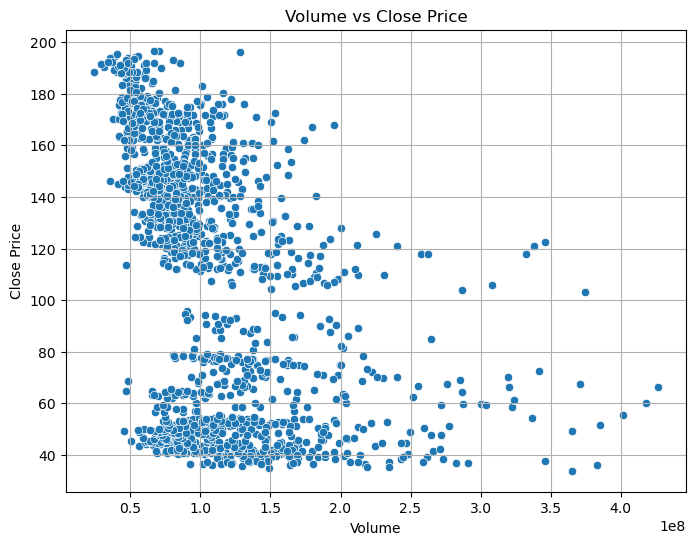

In [4]:
# 3. Scatter Plot - Volume vs Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


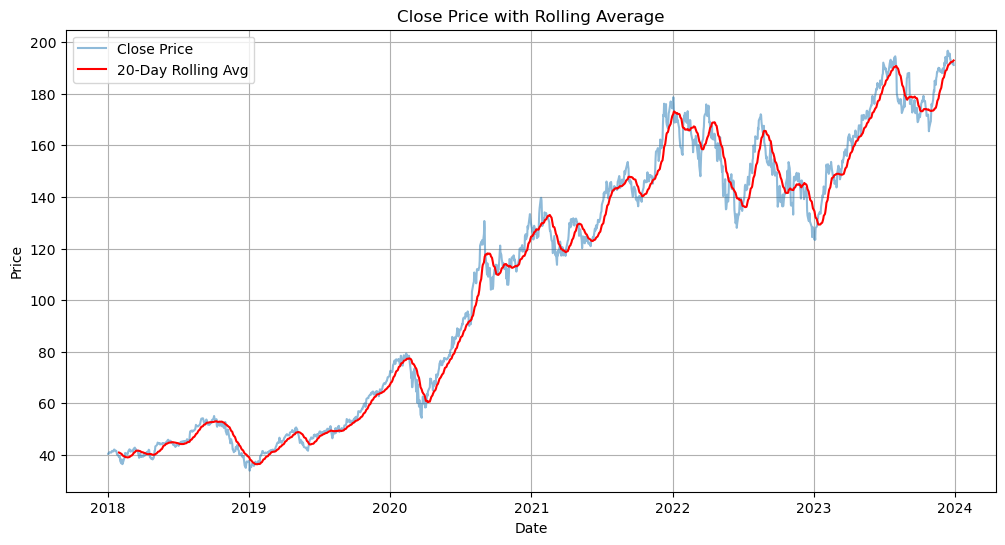

In [5]:
# 4. Rolling Average
df['Close_Rolling'] = df['Close'].rolling(window=20).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['Close_Rolling'], label='20-Day Rolling Avg', color='red')
plt.title('Close Price with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


XGBoost Mean Squared Error: 46.487828161448135
XGBoost R-squared: 0.8783701192534332


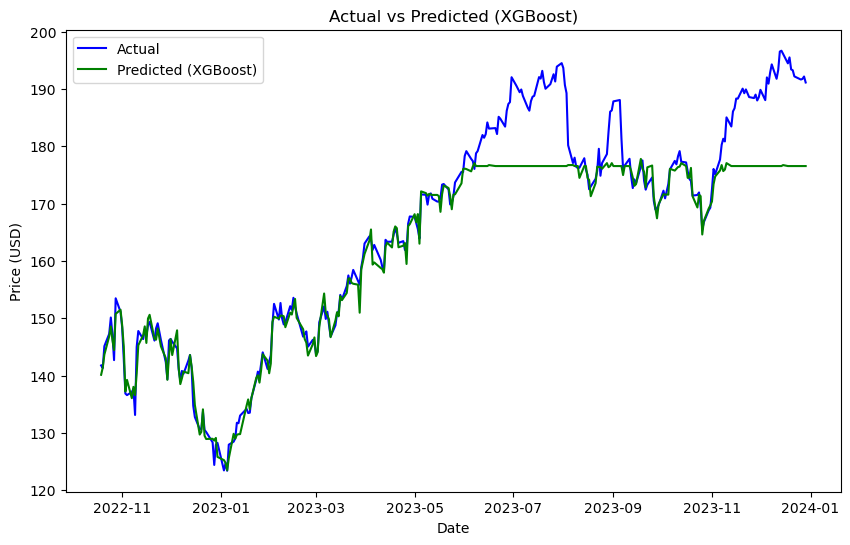

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data prepared in X_train_scaled, y_train, X_test_scaled, y_test

# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=20, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict the stock prices for the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='Predicted (XGBoost)', color='green')
plt.legend()
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Mean Squared Error: 14.498058143052585
MLP R-squared: 0.9620675528899274


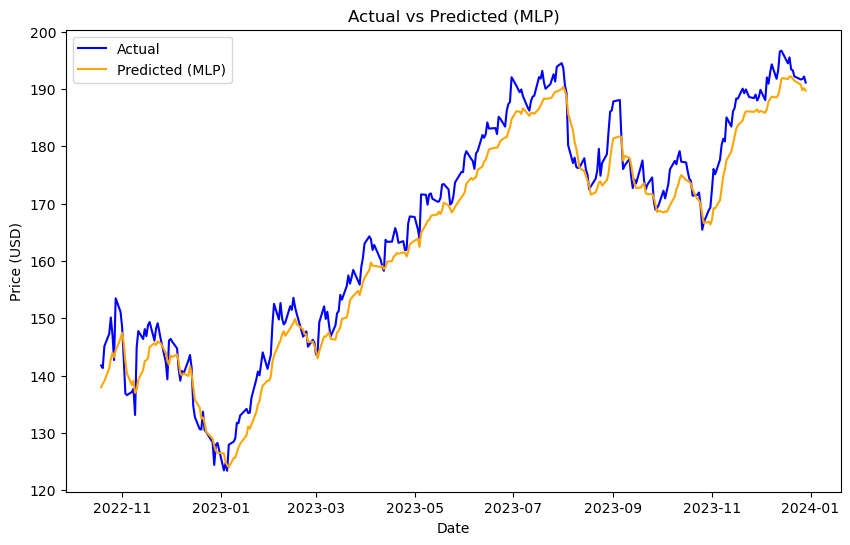

In [7]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predict the stock prices
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Mean Squared Error: {mse_mlp}')
print(f'MLP R-squared: {r2_mlp}')

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_mlp, label='Predicted (MLP)', color='orange')
plt.legend()
plt.title('Actual vs Predicted (MLP)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [10]:
import joblib
import numpy as np
from babel.numbers import format_currency

# Load the saved model and scaler
mlp_model = joblib.load("mlp_stock_model.pkl")
scaler = joblib.load("scaler.pkl")

# Use the latest available test feature row
latest_data = X_test_scaled[-1].reshape(1, -1)  # Ensure shape is correct

# Predict the next price
predicted_price = mlp_model.predict(latest_data)[0]

# Format prediction as USD
formatted_price = format_currency(predicted_price, 'USD', locale='en_US')

print(f"Predicted next price: {formatted_price}")


Predicted next price: $189.71
